In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from scipy.ndimage import find_objects
from matplotlib.colors import Normalize
from src.cpm_basic import CellularPottsModel

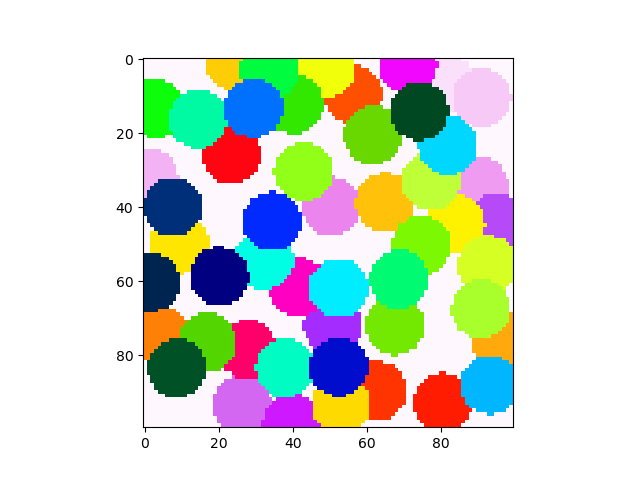

In [2]:
n_cells=50 
n_types=2 
T=26 
L=100
C_v=5
C_p=1
adhessions= np.array([[0, 20,  20],  
                      [20, 10, 40],
                      [20, 40, 60]]) 
lattice_type="circle"
object_volumes=None


cpm = CellularPottsModel(n_cells=n_cells, n_types=n_types, T=T, L=L, C_v=C_v, C_p=C_p, 
                         adhessions=adhessions, lattice_type=lattice_type, object_volumes=object_volumes)
cpm.run_animation()

In [3]:
def neighbors_2d(self, point_index):
    """
    Returns a list of the neighbors (periodic boundaries) for element (i, j).
    """
    i, j = point_index
    neighbors = [
                ((i - 1) % self.L, (j - 1) % self.L), 
                ((i - 1) % self.L, j),
                ((i - 1) % self.L, (j + 1) % self.L),
                (i, (j - 1) % self.L),
                (i, (j + 1) % self.L),
                ((i + 1) % self.L, (j - 1) % self.L),
                ((i + 1) % self.L, j),
                ((i + 1) % self.L, (j + 1) % self.L),
                ]
    return neighbors

In [4]:
neighbors_2d((31, 20), radius=2)

TypeError: neighbors_2d() got an unexpected keyword argument 'radius'